# Logistic Regression

In [ ]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/creditcard.csv')
df = pd.DataFrame(data)

## Data Visualization

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


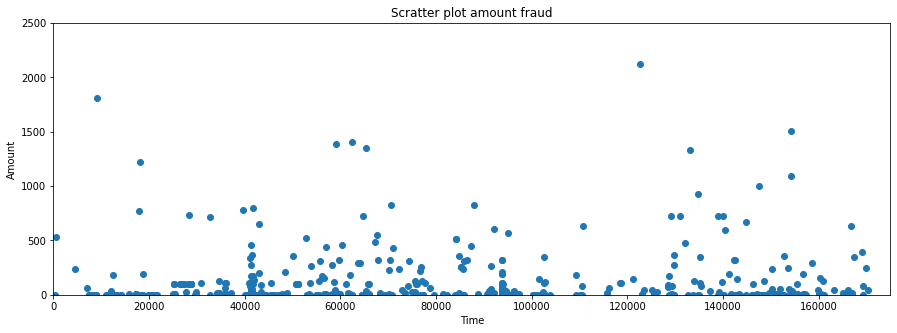

In [ ]:
df_fraud = df[df['Class'] == 1] 
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


## Unbalanced Data

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


## Correlation of the features

In [ ]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

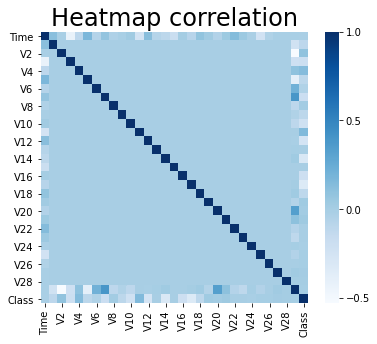

In [ ]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Selection

### UNDERSAMPLING

In [ ]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We divide the original dataset in two parts
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
# with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

## Fucntion for Confusion Matrix

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classifier.intercept_, classifier.coef_)

[-2.86438049] [[ 0.00908324 -0.6603154  -0.16940042  0.88268394 -0.31792477 -0.1732796
   0.84889956 -0.8684064  -0.3717664  -0.99396007  0.57272193 -0.94655916
  -0.551261   -1.3298367  -0.05560556 -0.55778326 -0.81908262 -0.00268815
  -0.03360937  0.03830921  0.20862332  0.54646126 -0.08992324 -0.62976972
   0.07651314 -0.34431767  0.16293138  0.47385403 -0.00490961]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.954468802698145


### Confusion Matrix

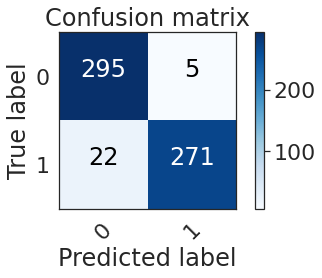

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       300
           1       0.98      0.92      0.95       293

    accuracy                           0.95       593
   macro avg       0.96      0.95      0.95       593
weighted avg       0.96      0.95      0.95       593



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.045531197301854974 
Mean Absolute Percentage error : 0.03709949409780776
Mean Squared Error : 0.045531197301854974
R Squared Error: 0.8178498293515358


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


# Undersampling using Synthetic Minority Oversampling Technique (SMOTE) approach

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train= oversample.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Applying Logistic Regression

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classifier.intercept_, classifier.coef_)

[-3.04955805] [[ 0.09881579 -0.61843021 -0.08189188  0.98817601 -0.34140006 -0.14366433
   0.79005715 -0.78762421 -0.40296671 -0.99835478  0.58143513 -1.0343642
  -0.49650436 -1.44568553  0.01833729 -0.58885464 -0.74998263 -0.06751787
  -0.00345061 -0.14034109  0.24413152  0.51893844 -0.16940419 -0.82928158
   0.17574159 -0.36855749  0.23615798  0.65471445 -0.00394447]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn after applying SMOTE: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn after applying SMOTE: 0.9583333333333334


## Confusion Matrix

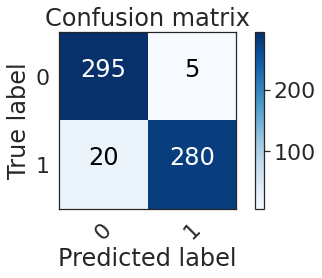

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       300
           1       0.98      0.93      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.041666666666666664 
Mean Absolute Percentage error : 0.03333333333333333
Mean Squared Error : 0.041666666666666664
R Squared Error: 0.8333333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


## Testing Error

In [ ]:
pred = classifier.predict(X_test_all)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_test_all,y_test_all)))

Accuracy from sk-learn: 0.952710170836826


### Confusion Matrix

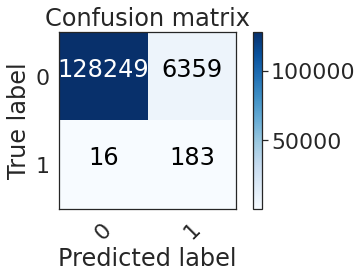

In [ ]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_test_all,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    134608
           1       0.03      0.92      0.05       199

    accuracy                           0.95    134807
   macro avg       0.51      0.94      0.52    134807
weighted avg       1.00      0.95      0.97    134807



In [ ]:
mean_abs_error = mean_absolute_error(y_test_all,pred)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred) // y_test_all))
mse= mean_squared_error(y_test_all,pred)
r_squared_error = r2_score(y_test_all,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.04728982916317402 
Mean Absolute Percentage error : 0.0001186881986840446
Mean Squared Error : 0.04728982916317402
R Squared Error: 0.310825356202742


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


## Hyperparameter Tuning

In [ ]:
classifier_b = LogisticRegression(class_weight={0:0.6,1:0.4})

In [ ]:
classifier_b.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight={0: 0.6, 1: 0.4}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_b = classifier_b.predict(X_test_all)

In [ ]:
print(classifier_b.intercept_, classifier_b.coef_)

[-3.45739348] [[ 4.35048957e-03 -2.51664252e-01 -3.61740218e-02  8.26839368e-01
  -2.50220585e-01 -2.74290597e-01  6.15419368e-01 -6.34898774e-01
  -1.82517507e-01 -6.05270468e-01  4.67967748e-01 -7.59020169e-01
  -4.98490194e-01 -1.12792340e+00 -9.47965834e-04 -3.66086059e-01
  -4.24973567e-01 -5.02473317e-02  1.24269131e-02 -1.91698161e-01
   2.03490667e-01  3.39239798e-01 -2.17260243e-01 -7.51611739e-01
   2.98256733e-01 -2.80065468e-01  1.67962169e-01  6.57350969e-01
  -1.26442642e-03]]


In [ ]:
print ('Accuracy from sk-learn after hyperpaarameter tuning: {}'.format(classifier_b.score(X_test_all,y_test_all)))

Accuracy from sk-learn after hyperpaarameter tuning: 0.9706024167884457


### Confusion Matrix

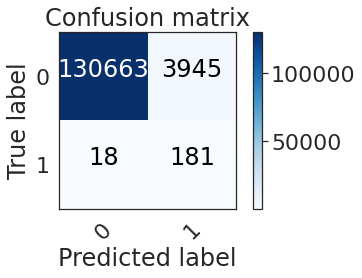

In [ ]:
cm = confusion_matrix(y_test_all, pred_b)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_test_all,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    134608
           1       0.04      0.91      0.08       199

    accuracy                           0.97    134807
   macro avg       0.52      0.94      0.53    134807
weighted avg       1.00      0.97      0.98    134807



In [ ]:
mean_abs_error = mean_absolute_error(y_test_all,pred_b)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred_b) // y_test_all))
mse= mean_squared_error(y_test_all,pred_b)
r_squared_error = r2_score(y_test_all,pred_b)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.029397583211554296 
Mean Absolute Percentage error : 0.00013352422351955016
Mean Squared Error : 0.029397583211554296
R Squared Error: 0.18944013907944574


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  
